# Effective Graph Paper
Code to generate "thaliana_impact" figure 

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import os
import numpy as np
import pandas as pd
from IPython.display import Image, display
import math
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import cana
from cana.datasets.bio import THALIANA
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.text import Text
from matplotlib.patches import Circle, Rectangle, RegularPolygon
from matplotlib.collections import PatchCollection
from IPython.display import display, Image, Latex, SVG, HTML

In [6]:
T = THALIANA()
corr_mat  = np.load("figure-thaliana/THALIANAimpact.npy")

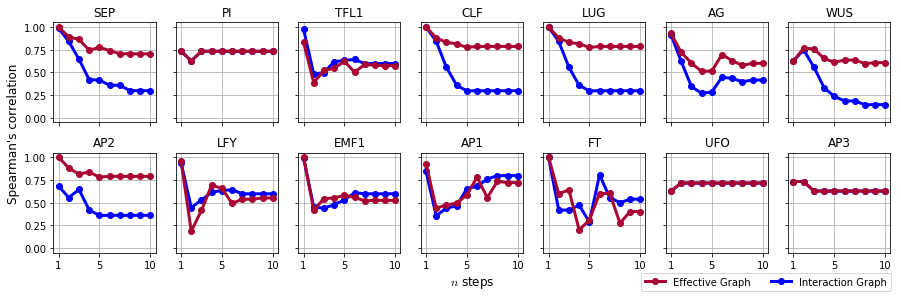

In [9]:
fig, axes = plt.subplots(2,7,figsize=(15,4), sharex=True, sharey=True)
axes = axes.flatten()
axesl = axes.tolist()
i = 0
for node in T.nodes:
    if node.name in ['FUL']:
        i += 1
        continue
    ax = axesl.pop()
    ys_eff = corr_mat[0,i,:]
    ys_int = corr_mat[1,i,:]
    xs = np.arange(1,len(ys_eff)+1,1)
    #ax.fill_between( np.arange(1,n_steps+1), corrmean-corrstd, corrmean+corrstd , color=colors[ip], alpha=0.2)                 
    ax.plot(xs, ys_eff, c='#A90533', label='Effective Graph',
            marker='o', ms=6, lw=3, ls='-', zorder=6)
    ax.plot(xs, ys_int, c='blue', label='Interaction Graph',
            marker='o', ms=6, lw=3, ls='-', zorder=5)
    
    ax.set_title(node.name)
    ax.set_xlim(0.5,10.5)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks([1,5,10])
    ax.set_yticks([0.0,0.25,0.5,0.75,1.0])
    ax.grid(zorder=1)
    #ax.set(adjustable=, aspect=10)
    i += 1

axes[7].set_ylabel("Spearman's correlation", ha='left', fontsize=12)
axes[10].set_xlabel(r'$n$ steps', fontsize=12)
plt.legend(loc='lower right', bbox_to_anchor=(1.05,-0.43),
           ncol=2)

#plt.tight_layout()
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.30)
plt.savefig("figure-thaliana/thaliana_predpower.svg", dpi=100)
plt.show()